# Titanic Survivor

In [1]:
# Firstly we do Univariant, now we will be doing Multivariant(more than 1 feature)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
train_df = pd.read_csv(r"C:\Users\prajwal\Downloads\trainTitanic.csv")
test_df = pd.read_csv(r"C:\Users\prajwal\Downloads\testTitanic.csv")

In [4]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
train_df.shape

(891, 12)

In [6]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# EDA -> Exploratory Data Analysis

<Axes: ylabel='Density'>

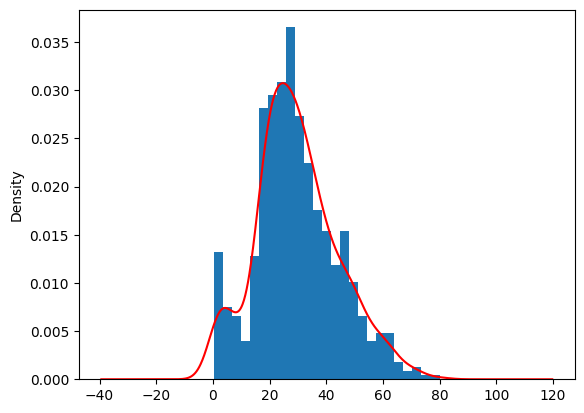

In [8]:
train_df['Age'].hist(bins = 25, density = True)
train_df['Age'].plot(kind = 'density', color='red')

In [9]:
# Gaussian Distribution is followed

<Axes: xlabel='Embarked', ylabel='count'>

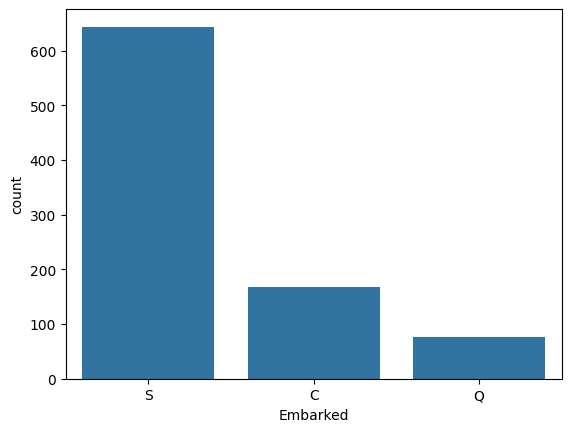

In [10]:
import seaborn as sns
sns.countplot(x = 'Embarked', data = train_df)

In [11]:
all_data = train_df.copy()

In [12]:
# Graph is saying people with 28 age is more

In [13]:
# We need to recreate the data in place of Nan(Number so great that cannot be store, missing Data)

In [14]:
# We can use mean, median or mode. We'll prefer mean more in these cases. We will be using median in this because in mean of age, floating number will appear.

In [15]:
train_df['Age'].fillna(train_df['Age'].median(), inplace=True )

C:\Users\prajwal\AppData\Local\Temp\ipykernel_11360\1007164528.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].median(), inplace=True )


In [16]:
#Filling with train_df median

In [17]:
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())

<Axes: ylabel='Density'>

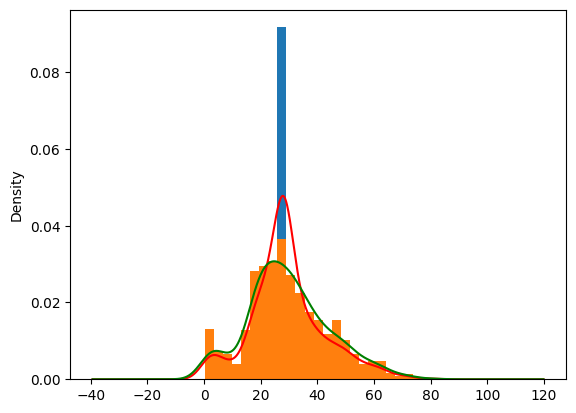

In [18]:
train_df['Age'].hist(bins = 25, density = True)
train_df['Age'].plot(kind = 'density', color='red')
all_data['Age'].hist(bins = 25, density = True)
all_data['Age'].plot(kind = 'density', color='green')

In [19]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [20]:
train_df['Travel_Alone'] = np.where((train_df['SibSp'] + train_df['Parch']) > 0, 0, 1)     # if greater than 0, give 1 else 0
# np.where is use to merge operations and also use for other advance operations.

In [21]:
# Replacing string data(Cabin)

In [22]:
# As there are lots of value unavailable, we will drop the column as it can lead to a lot of human intervention otherwise we will be solving the problem using node(As for string, we prefer this)

In [23]:
# We can create 20Percent human intervention only not 80Percent

In [24]:
train_df.drop('Cabin', inplace = True, axis = 1)   # Axis = 1, means variable is row therefore constant column.

In [25]:
train_df.isna().sum()
# Now we will solve Embarked value

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        2
Travel_Alone    0
dtype: int64

In [26]:
train_df['Embarked'].fillna(train_df['Embarked'].value_counts().idxmax(), inplace = True)   # Pandas to numpy conversion -> value
                                                                                            # To count any value -> value_counts 
                                                                                            # The value which is occuring maximum times we will be using that.

C:\Users\prajwal\AppData\Local\Temp\ipykernel_11360\160697702.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Embarked'].fillna(train_df['Embarked'].value_counts().idxmax(), inplace = True)   # Pandas to numpy conversion -> value


In [27]:
train_df['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [28]:
train_df['Embarked'].value_counts().idxmax()

'S'

In [29]:
# PassengerId ,name and ticket has no role in Determining result. We will be dropping that.

In [30]:
train_df.drop('PassengerId', axis = 1, inplace = True)
train_df.drop('Name', axis = 1, inplace = True)
train_df.drop('Ticket', axis = 1, inplace = True)
train_df.drop('SibSp', axis = 1, inplace = True)
train_df.drop('Parch', axis = 1, inplace = True)

In [31]:
train_df

,Survived,Pclass,Sex,Age,Fare,Embarked,Travel_Alone
0,0,3,male,22.0,7.2500,S,0
1,1,1,female,38.0,71.2833,C,0
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,0
4,0,3,male,35.0,8.0500,S,1
...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,S,1
887,1,1,female,19.0,30.0000,S,1
888,0,3,female,28.0,23.4500,S,0
889,1,1,male,26.0,30.0000,C,1


In [32]:
# EDA -> Exploratory Data Analysis

In [33]:
# Axis of pandas is inverse of numpy

In [34]:
# Using EDA to analysis feature importance

In [35]:
train_df = pd.get_dummies(train_df, columns = ['Sex', 'Embarked'])

In [36]:
train_df

,Survived,Pclass,Age,Fare,Travel_Alone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,7.2500,0,False,True,False,False,True
1,1,1,38.0,71.2833,0,True,False,True,False,False
2,1,3,26.0,7.9250,1,True,False,False,False,True
3,1,1,35.0,53.1000,0,True,False,False,False,True
4,0,3,35.0,8.0500,1,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,13.0000,1,False,True,False,False,True
887,1,1,19.0,30.0000,1,True,False,False,False,True
888,0,3,28.0,23.4500,0,True,False,False,False,True
889,1,1,26.0,30.0000,1,False,True,True,False,False


In [37]:
# Get_Dummies is use to get data in (1,0) from 

In [38]:
# 1,0 in place of True, False

In [39]:
train_df['Sex_female'] = np.where((train_df['Sex_female']) == True, 1, 0) 
train_df['Sex_male'] = np.where((train_df['Sex_male']) == True, 1, 0) 
train_df['Embarked_C'] = np.where((train_df['Embarked_C']) == True, 1, 0) 
train_df['Embarked_Q'] = np.where((train_df['Embarked_Q']) == True, 1, 0) 
train_df['Embarked_S'] = np.where((train_df['Embarked_S']) == True, 1, 0) 

In [40]:
train_df

,Survived,Pclass,Age,Fare,Travel_Alone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,7.2500,0,0,1,0,0,1
1,1,1,38.0,71.2833,0,1,0,1,0,0
2,1,3,26.0,7.9250,1,1,0,0,0,1
3,1,1,35.0,53.1000,0,1,0,0,0,1
4,0,3,35.0,8.0500,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,13.0000,1,0,1,0,0,1
887,1,1,19.0,30.0000,1,1,0,0,0,1
888,0,3,28.0,23.4500,0,1,0,0,0,1
889,1,1,26.0,30.0000,1,0,1,1,0,0


<Axes: xlabel='Age', ylabel='Density'>

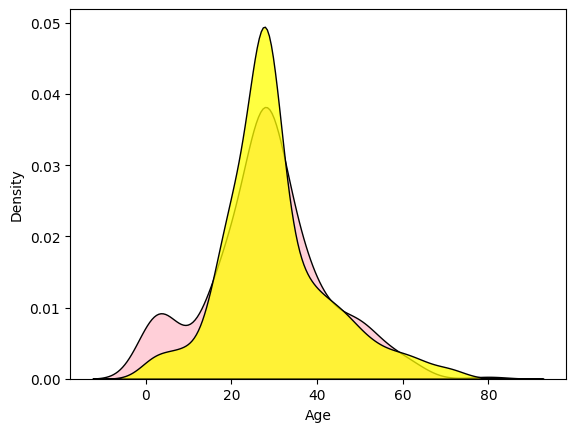

In [41]:
sns.kdeplot(data = train_df['Age'][train_df.Survived ==1], multiple = 'stack', color = 'pink')
sns.kdeplot(data = train_df['Age'][train_df.Survived ==0], multiple = 'stack', color = 'yellow')

In [42]:
# Clear Distribution is seen, which can be followed

<Axes: xlabel='Fare', ylabel='Density'>

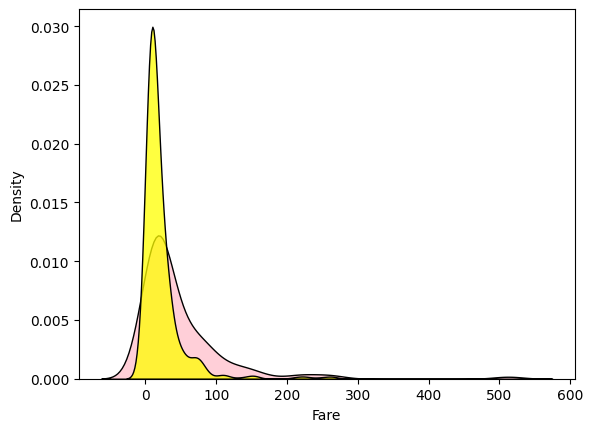

In [43]:
sns.kdeplot(data = train_df['Fare'][train_df.Survived ==1], multiple = 'stack', color = 'pink')
sns.kdeplot(data = train_df['Fare'][train_df.Survived ==0], multiple = 'stack', color = 'yellow')

<Axes: xlabel='Pclass', ylabel='Survived'>

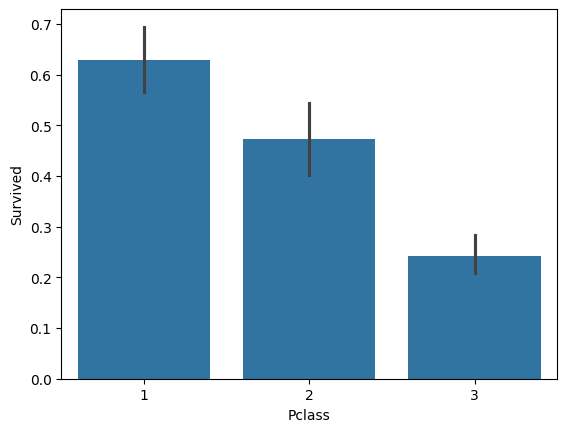

In [44]:
sns.barplot(data = train_df, x = 'Pclass', y = 'Survived')  # Width of vig represents variance, line depicts mean_value.


<Axes: xlabel='Sex', ylabel='Pclass'>

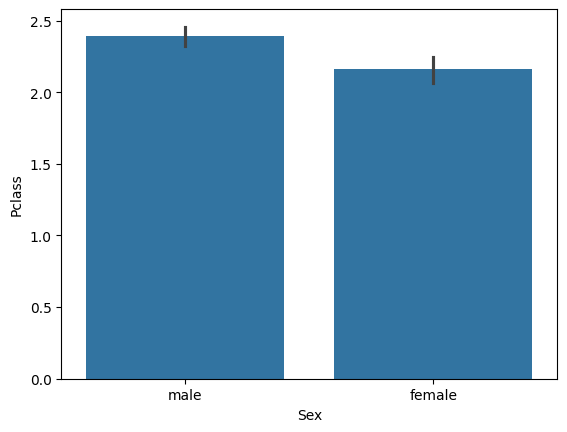

In [45]:
sns.barplot(data = all_data, x = 'Sex', y = 'Pclass') 

<Axes: xlabel='Embarked', ylabel='Survived'>

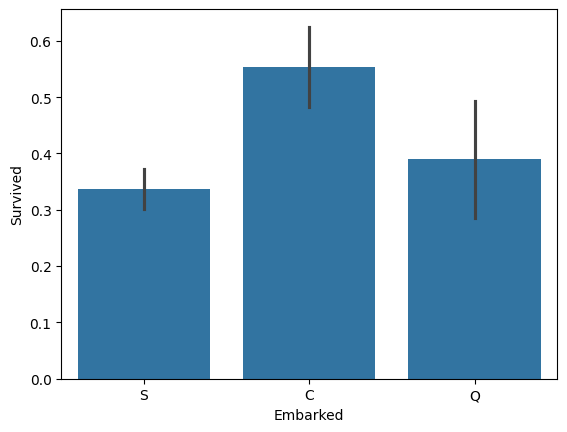

In [46]:
sns.barplot(data = all_data, x = 'Embarked', y = 'Survived') 

In [47]:
# 'C' people more suvived -> people who get from France more survived.

<Axes: xlabel='SibSp', ylabel='Survived'>

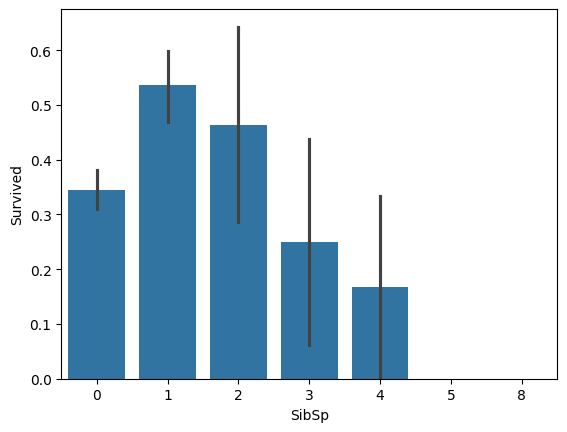

In [48]:
sns.barplot(data = all_data, x = 'SibSp', y = 'Survived') 

<Axes: xlabel='Parch', ylabel='Survived'>

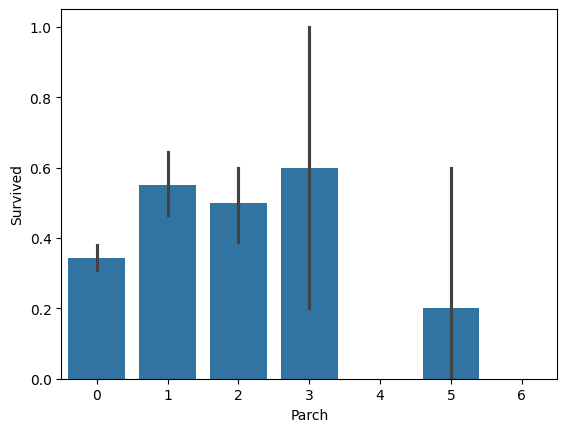

In [49]:
sns.barplot(data = all_data, x = 'Parch', y = 'Survived') 

<Axes: xlabel='Travel_Alone', ylabel='Survived'>

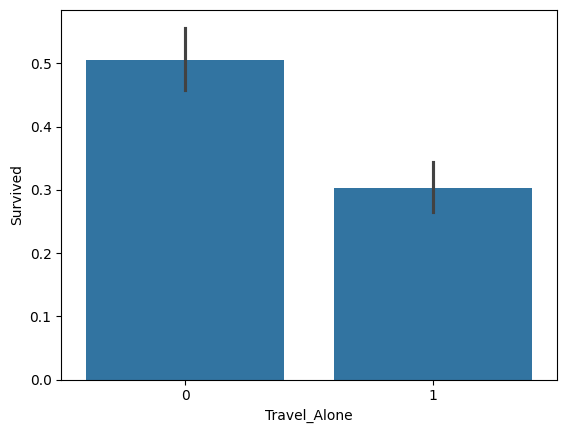

In [50]:
sns.barplot(data = train_df, x = 'Travel_Alone', y = 'Survived') 

<Axes: xlabel='Sex', ylabel='Survived'>

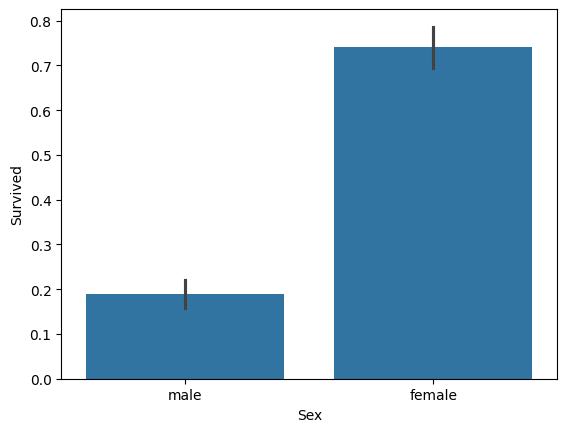

In [51]:
sns.barplot(data = all_data, x = 'Sex', y = 'Survived') 

<Axes: xlabel='Sex', ylabel='Fare'>

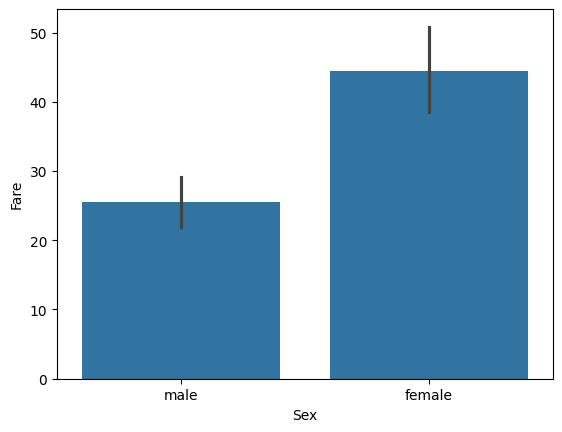

In [52]:
sns.barplot(data = all_data, x = 'Sex', y = 'Fare') 

In [53]:
# Women spending more money than man.

In [54]:
# EDA shows us the hidden pattern

<Axes: xlabel='Sex', ylabel='SibSp'>

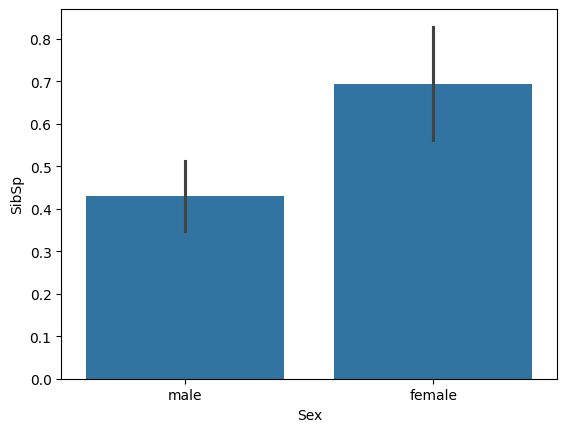

In [55]:
sns.barplot(data = all_data, x = 'Sex', y = 'SibSp') 

<Axes: xlabel='Sex', ylabel='Parch'>

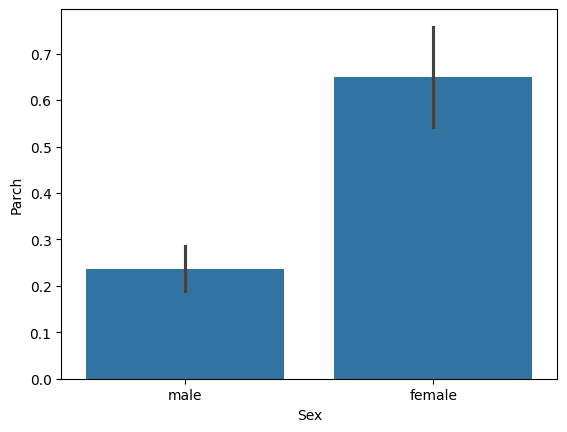

In [56]:
sns.barplot(data = all_data, x = 'Sex', y = 'Parch') 

<Axes: >

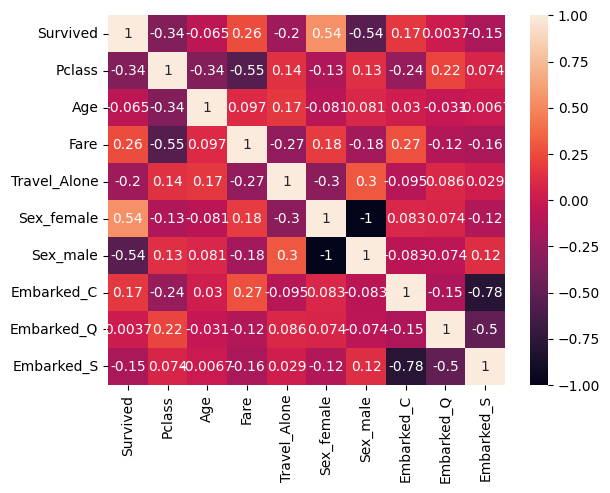

In [57]:
sns.heatmap(train_df.corr(), annot = True)

In [58]:
label = train_df['Survived']

In [59]:
train_df.drop(['Survived'], axis = 1, inplace = True)

In [60]:
train_df = train_df.values
label = label.values

In [61]:
ones = np.ones((train_df.shape[0], 1))
train_df = np.hstack((ones, train_df))

In [62]:
split = 0.8

train_X = train_df[:int(split * train_df.shape[0]), :]
test_X = train_df[int(split * train_df.shape[0]) :, :]
train_Y = label[:int(split * label.shape[0])]
test_Y = label[int(split * label.shape[0]):]

In [63]:
print(train_X.shape, test_X.shape, train_Y.shape, test_Y.shape)

(712, 10) (179, 10) (712,) (179,)


In [64]:
def hypothesis(X, weights):
    return 1 / (1+np.exp(-1*np.dot(X, weights)))

In [65]:
def loss_func (X, weights, Y):
    Y_pred = hypothesis(X,weights)
    loss = np.mean(Y * np.log(Y_pred) + (1-Y) * np.log(1-Y_pred))
    return -1 * loss

In [66]:
def gradient(X, Y, weight):
    y_pred = hypothesis(X, weight)
    grad = np.dot(X.T, (Y - y_pred))
    
    return grad/X.shape[0]

In [71]:
def gradient_descent(X, Y):
    weights = np.zeros((X.shape[1], ))
    lr_rate = 0.003
    loss_epoch = []

    epochs = 10000
    
    for i in range(epochs):
        grad = gradient(X, Y, weights)
        loss_epoch.append(loss_func(X, weights, Y))
        weights = weights + lr_rate * grad

    return weights, loss_epoch

In [72]:
import time
start = time.time()
weights, loss_epoch = gradient_descent(train_X, train_Y)
print(time.time() - start)

1.6026992797851562


In [73]:
loss_epoch

[0.6931471805599453,
 0.6536101337120834,
 0.6428701288201245,
 0.6390146703682131,
 0.6372879253982792,
 0.636437501039753,
 0.6358918492851912,
 0.6355648918389342,
 0.6353204641029938,
 0.6351376641516024,
 0.6349805737206655,
 0.6348401519026255,
 0.6347073086325824,
 0.6345789295304907,
 0.6344527570547162,
 0.6343278714390873,
 0.6342037112314672,
 0.6340800242040207,
 0.6339566693404102,
 0.6338335795592356,
 0.633710718852014,
 0.6335880693782124,
 0.6334656216045654,
 0.633343370554357,
 0.6332213134303926,
 0.6330994485964005,
 0.6329777749839305,
 0.6328562918246299,
 0.632734998498109,
 0.6326138944631051,
 0.6324929792173748,
 0.6323722522804506,
 0.6322517131826951,
 0.6321313614611871,
 0.6320111966565795,
 0.6318912183122259,
 0.6317714259732081,
 0.6316518191862123,
 0.6315323974991954,
 0.6314131604614063,
 0.6312941076232568,
 0.6311752385363549,
 0.6310565527534481,
 0.6309380498284458,
 0.6308197293163923,
 0.630701590773479,
 0.63058363375703,
 0.6304658578255075,

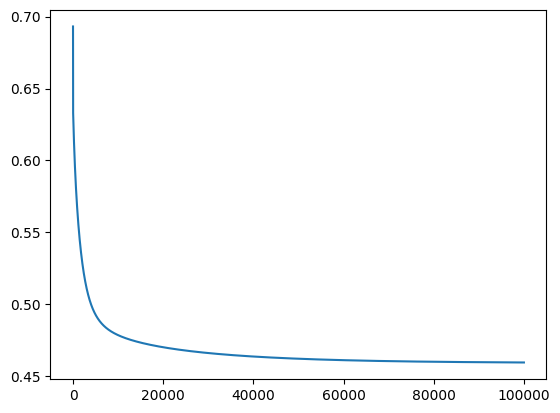

In [70]:
plt.plot(loss_epoch)

In [77]:
def predict(X, weights):
    pred = hypothesis(X, weights)
    
    if pred > 0.5:
        return 1
    else:
        return 0

In [78]:
print(predict(test_X[1], weights), test_Y[1])

0 0


In [79]:
corr = 0
for i in range(test_X.shape[0]):
    pred = predict(test_X[i], weights)
    if pred == test_Y[i]:
        corr += 1
print(corr/test_X.shape[0])        

0.8044692737430168


In [80]:
# Feature Engineering -> Accuracy can increase if we remove non-importance features(cols)

In [81]:
# Here, we have not normalize the data.